In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from fbprophet import Prophet
import pmdarima as pm
import math

Importing plotly failed. Interactive plots will not work.


In [2]:
discretionary_sector_pd = pd.read_csv('KU_consumer_discretionary_sector_export.csv')
discretionary_sector_pd['date'] = pd.to_datetime(discretionary_sector_pd['date'])

In [3]:
discretionary_sector_pd = discretionary_sector_pd.set_index('date')

In [7]:
df_nike = discretionary_sector_pd[['nike']]

Text(0.5, 1.0, 'Nike Closing Price')

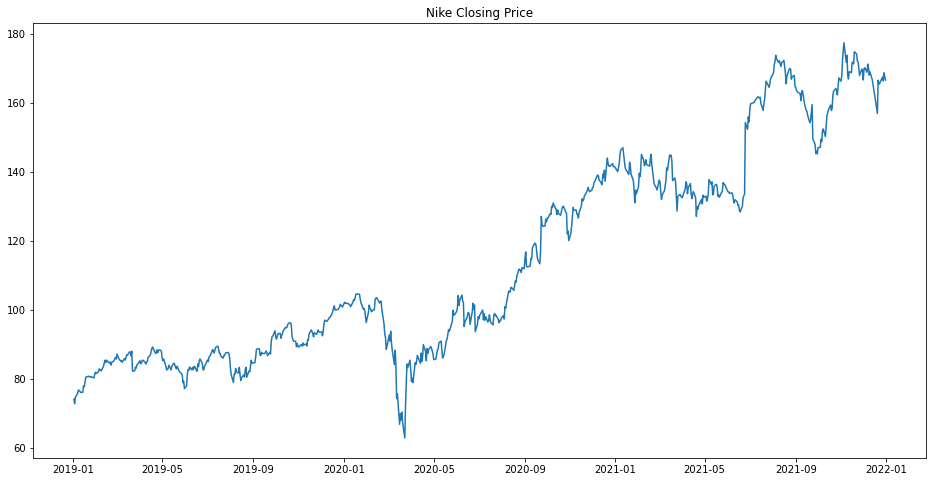

In [4]:
#plot
plt.figure(figsize=(16,8))
plt.plot(discretionary_sector_pd['nike'], label='Close Price History')
plt.title('Nike Closing Price')

Text(0.5, 1.0, 'S&P Closing Price')

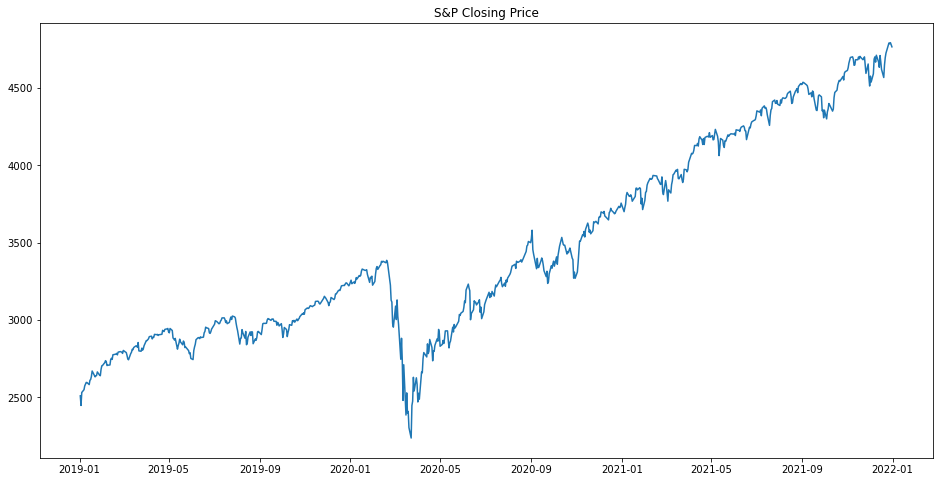

In [5]:
plt.figure(figsize=(16,8))
plt.plot(discretionary_sector_pd['spstock'], label='Close Price History')
plt.title('S&P Closing Price')

Text(0.5, 1.0, 'Consumer Discretionary Closing Price')

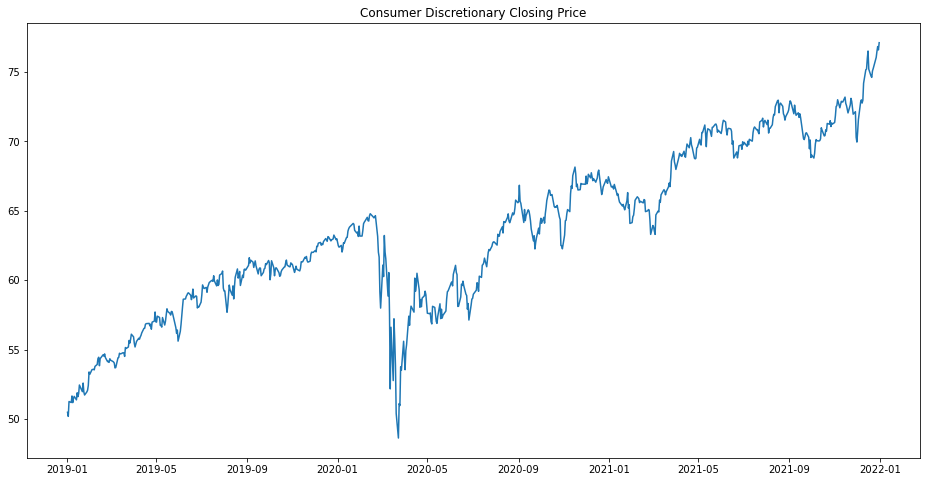

In [6]:
plt.figure(figsize=(16,8))
plt.plot(discretionary_sector_pd['consumer_discretionary'], label='Close Price History')
plt.title('Consumer Discretionary Closing Price')

<AxesSubplot:ylabel='Density'>

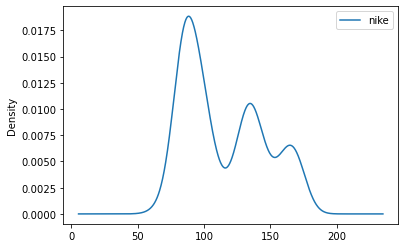

In [8]:
df_nike_close = df_nike[['nike']]
df_nike_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

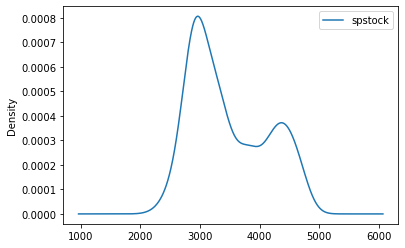

In [9]:
df_sp_close = discretionary_sector_pd[['spstock']]
df_sp_close.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

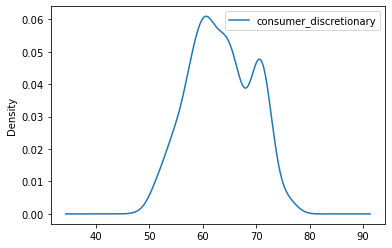

In [10]:
df_discretionary_close = discretionary_sector_pd[['consumer_discretionary']]
df_discretionary_close.plot(kind='kde')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 432x288 with 0 Axes>

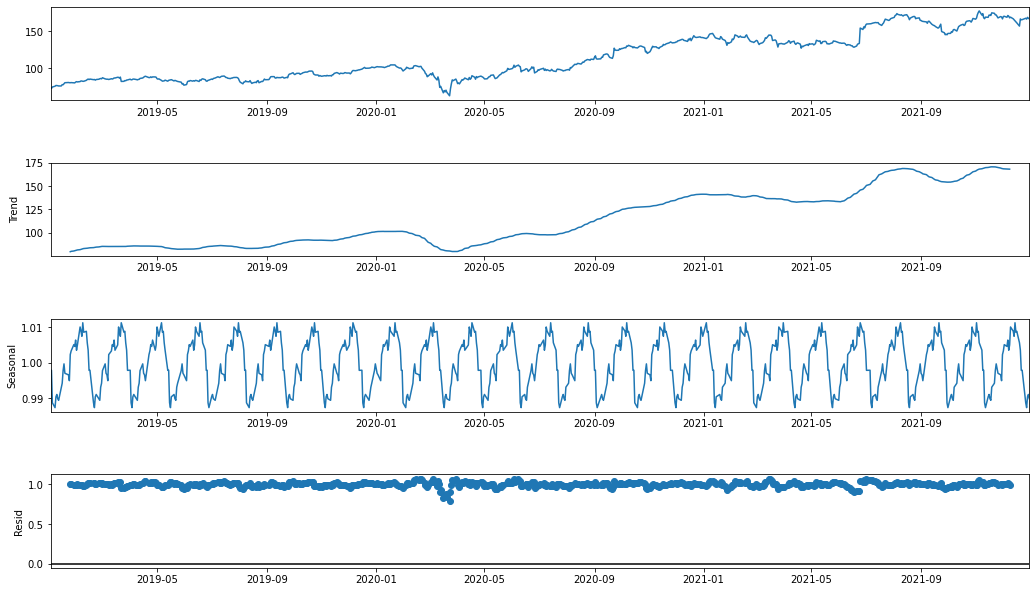

In [11]:
#Looking at trend and seasonality from time series
result = seasonal_decompose(df_nike_close, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


Text(0.5, 0.98, 'Consumer Discretionary Sector')

<Figure size 432x288 with 0 Axes>

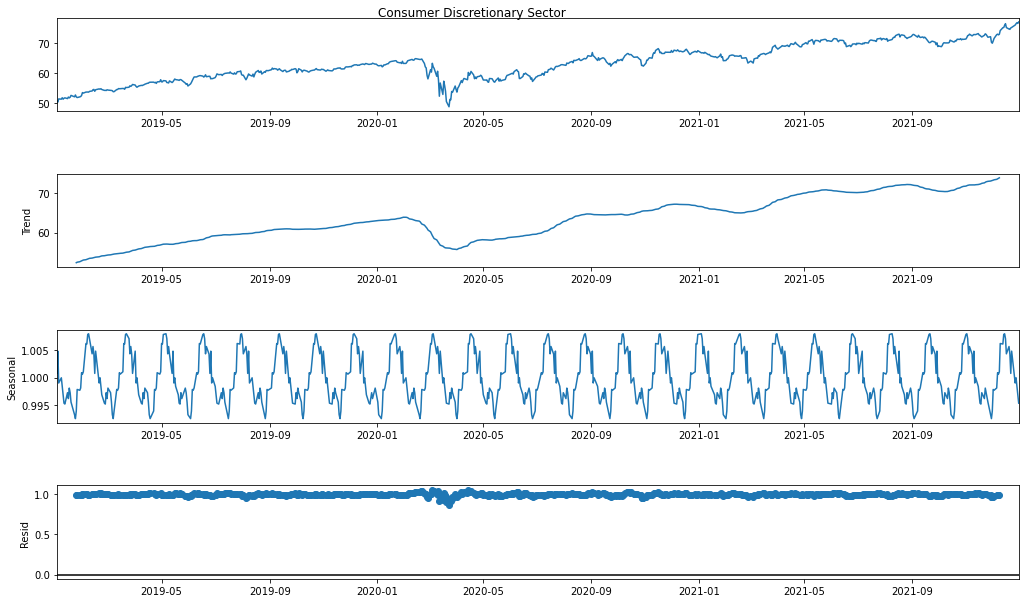

In [43]:
#Looking at trend and seasonality from time series
result = seasonal_decompose(df_discretionary_close, model='multiplicative', freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16,9)
fig.suptitle('Consumer Discretionary Sector')

Since data is not stationary we will preform log transformation to eliminate trend

In [13]:
df_nike_log = np.log(df_nike_close)

In [14]:
df_discretionary_log = np.log(df_discretionary_close)

Split data into train and test sets

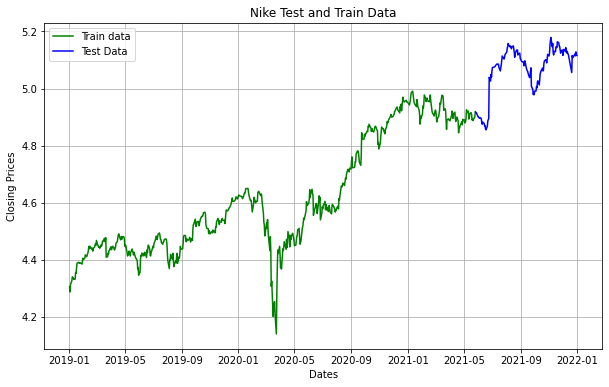

In [15]:
nike_train_data= df_nike_log.iloc[:int(df_nike_log.shape[0]*0.8)]
nike_test_data = df_nike_log.iloc[int(df_nike_log.shape[0]*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(nike_train_data, 'Green', label='Train data')
plt.plot(nike_test_data, 'blue',  label='Test Data')
plt.title('Nike Test and Train Data')
plt.legend()

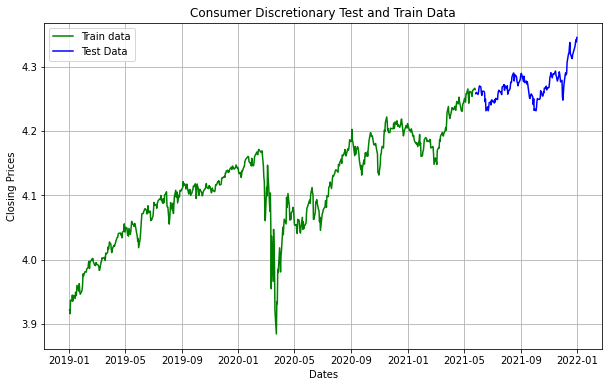

In [16]:
discretionary_train_data= df_discretionary_log.iloc[:int(df_discretionary_log.shape[0]*0.8)]
discretionary_test_data = df_discretionary_log.iloc[int(df_discretionary_log.shape[0]*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(discretionary_train_data, 'Green', label='Train data')
plt.plot(discretionary_test_data, 'blue',  label='Test Data')
plt.title('Consumer Discretionary Test and Train Data')
plt.legend()

This Machine Learning Model will run a linear regression, ARIMA, and a Facebook Prophet Model
-some limitations of these models will be they do not take into accoutn current world sitations (like COVID impacts on the economy)

Linear Regression Model

In [17]:
df_linear_nike = discretionary_sector_pd[['nike', 'spstock']]

In [18]:
df_linear_discretionary = discretionary_sector_pd[['consumer_discretionary', 'spstock']]

In [19]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_nike[['nike']], df_linear_nike[['spstock']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error Statistics for nike Linear Regression')
print('MSE: ' + str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: ' + str(mape))

Error Statistics for nike Linear Regression
MSE: 26826.313673926375
MAE: 131.89978732497775
RMSE: 163.78740389274864
MAPE: spstock    0.037833
dtype: float64


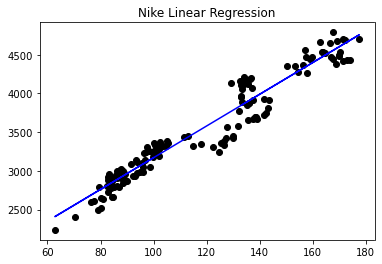

In [20]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.title('Nike Linear Regression')
plt.show()

In [21]:
# for linear regression model we need an x_train value, and a y_train value
X_train, X_test, y_train, y_test = train_test_split(df_linear_discretionary[['consumer_discretionary']], df_linear_nike[['spstock']], test_size=.2)

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Error Statistics for Tech Linear Regression')
print('MSE: ' + str(mse))
mae = mean_absolute_error(y_test, y_pred)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print('MAPE: ' + str(mape))

Error Statistics for Tech Linear Regression
MSE: 38635.1211063025
MAE: 171.25046350359432
RMSE: 196.5581875839887
MAPE: spstock    0.052951
dtype: float64


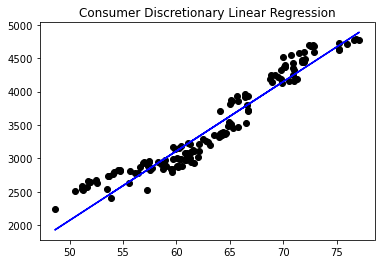

In [22]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue')
plt.title('Consumer Discretionary Linear Regression')
plt.show()

ARIMA Model


In [23]:
#Determining optimal parameters
arima_model_param = pm.auto_arima(nike_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model_param.fit(nike_train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3004.345, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3007.864, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3006.646, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3006.570, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3008.303, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3004.367, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.005 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [24]:
#Modeling
arima_model = ARIMA(nike_train_data, order=(0,1,0))
arima_fitted = arima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.49326D+00    |proj g|=  1.24789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1     13      1     0     0   1.150D-05  -2.493D+00
  F =  -2.4932647928645375     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

In [25]:
#Forecast
arima_forecast, se, conf = arima_fitted.forecast(len(nike_test_data), alpha=0.05)

arima_fc_series = pd.Series(arima_forecast, index=nike_test_data.index)
lower_series = pd.Series(conf[:,0], index=nike_test_data.index)
upper_series = pd.Series(conf[:,1], index=nike_test_data.index)

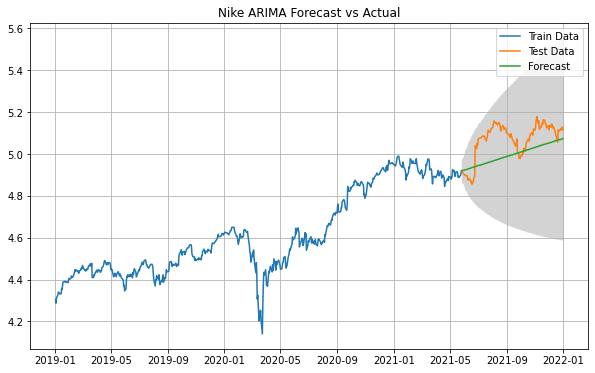

In [27]:
#ARIMA Plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(nike_train_data, label='Train Data')
plt.plot(nike_test_data, label='Test Data')
plt.plot(arima_fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgrey')
plt.title('Nike ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [29]:
# ARIMA Model Statistics
print('Error Statistics for Nike ARIMA Model')
mse = mean_squared_error(nike_test_data, arima_forecast)
print('MSE: ' + str(mse))
mae = mean_absolute_error(nike_test_data, arima_forecast)
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(nike_test_data, arima_forecast))
print('RMSE: '+str(rmse))

Error Statistics for Nike ARIMA Model
MSE: 0.009704196788341696
MAE: 0.08578820392059748
RMSE: 0.09850988167865037


In [30]:
#Determining optimal parameters
arima_model_param = pm.auto_arima(discretionary_train_data, d=1, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', max_p=6, max_order=None , trace=True)

arima_model_param.fit(discretionary_train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3608.681, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3569.071, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3601.265, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3594.825, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3569.842, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3607.353, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3604.588, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3615.078, Time=0.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3609.311, Time=0.49 sec


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-3641.861, Time=0.29 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-3632.073, Time=0.71 sec


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-3643.510, Time=0.75 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-3624.872, Time=0.29 sec


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(6,1,2)(0,0,0)[0] intercept   : AIC=-3642.623, Time=0.88 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-3644.900, Time=0.82 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-3627.138, Time=0.76 sec
 ARIMA(6,1,3)(0,0,0)[0] intercept   : AIC=-3626.801, Time=0.95 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=-3627.862, Time=0.82 sec
 ARIMA(6,1,4)(0,0,0)[0] intercept   : AIC=-3535.375, Time=1.01 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=-3646.109, Time=0.52 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=-3625.833, Time=0.43 sec


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=-3648.192, Time=0.47 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-3652.649, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-3615.857, Time=0.35 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=-3625.513, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-3604.456, Time=0.12 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-3619.647, Time=0.44 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=-3624.434, Time=0.15 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0]          
Total fit time: 13.500 seconds


ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [31]:
#Modeling
arima_model = ARIMA(discretionary_train_data, order=(4,1,2))
arima_fitted = arima_model.fit()

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, bu

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03845D+00    |proj g|=  4.04951D-01

At iterate    5    f= -3.03845D+00    |proj g|=  9.37998D-02

At iterate   10    f= -3.03846D+00    |proj g|=  2.00747D-02

At iterate   15    f= -3.03846D+00    |proj g|=  9.77058D-03

At iterate   20    f= -3.03847D+00    |proj g|=  5.81362D-03

At iterate   25    f= -3.03847D+00    |proj g|=  4.65867D-03

At iterate   30    f= -3.03847D+00    |proj g|=  6.96743D-02

At iterate   35    f= -3.03847D+00    |proj g|=  8.60189D-02

At iterate   40    f= -3.03847D+00    |proj g|=  2.64793D-03

At iterate   45    f= -3.03847D+00    |proj g|=  3.03045D-02

At iterate   50    f= -3.03847D+00    |proj g|=  4.32917D-02

At iterate   55    f= -3.03848D+00    |proj g|=  2.29017D-04

At iterate   60    f= -3.03848D+00    |proj g|=  7.88436D-04

At iterate   65    f= -3.0

In [32]:
#Forecast
arima_forecast, se, conf = arima_fitted.forecast(len(discretionary_test_data), alpha=0.05)

arima_fc_series = pd.Series(arima_forecast, index=discretionary_test_data.index)
lower_series = pd.Series(conf[:,0], index=discretionary_test_data.index)
upper_series = pd.Series(conf[:,1], index=discretionary_test_data.index)

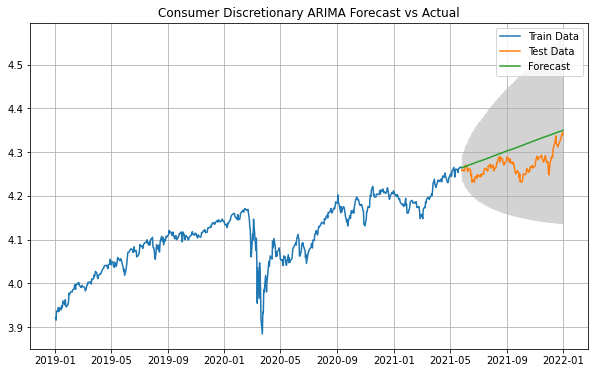

In [33]:
#ARIMA Plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(discretionary_train_data, label='Train Data')
plt.plot(discretionary_test_data, label='Test Data')
plt.plot(arima_fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='lightgrey')
plt.title('Consumer Discretionary ARIMA Forecast vs Actual')
plt.legend()
plt.show()

Facebook Prophet Model

In [34]:
prophet_data = pd.DataFrame()
prophet_data['y'] = df_nike_log['nike']
prophet_data['ds'] = discretionary_sector_pd.index


#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=212)
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.12692
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2586.76    0.00147217       1232.94           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2636.32   0.000321102       745.363      0.1826      0.1826      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2670.19    0.00312541       697.045           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2677.27     0.0108441       712.712           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     462       2686.35   8.32839e-06       219.909   2.428e-08       0.001      570  LS failed, Hessian reset 
     499       2688.93    0.00468245    

In [35]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})
forecast = forecast[forecast.index.dayofweek < 5]
forecast = forecast.loc['2021-05-27':'2021-12-31']

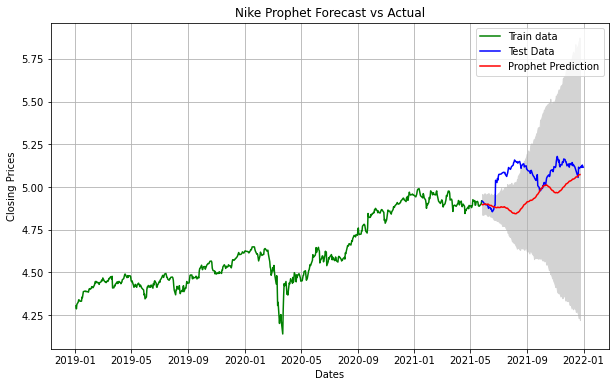

In [36]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(nike_train_data, 'Green', label='Train data')
plt.plot(nike_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.fill_between(forecast['yhat_lower'].index, forecast['yhat_lower'], forecast['yhat_upper'], color='lightgrey')
plt.title('Nike Prophet Forecast vs Actual')
plt.legend()

In [37]:
#Prophet Model Statistics
print('Error Statistics for Nike Prophet Model')
mse = mean_squared_error(nike_test_data, forecast['Prediction'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(nike_test_data, forecast['Prediction'])
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(nike_test_data, forecast['Prediction']))
print('RMSE: '+str(rmse))

Error Statistics for Nike Prophet Model
MSE: 0.025362518221982856
MAE: 0.13128067154833759
RMSE: 0.15925614029601137


In [38]:
prophet_data = pd.DataFrame()
prophet_data['y'] = df_discretionary_log['consumer_discretionary']
prophet_data['ds'] = discretionary_sector_pd.index


#train and validation
prophet_train = prophet_data[:int(prophet_data.shape[0]*0.80)]
prophet_test = prophet_data[int(prophet_data.shape[0]*0.80):]

#fit the model
prophet_model = Prophet(interval_width=0.95)
prophet_model.fit(prophet_train)

#predictions
close_prices = prophet_model.make_future_dataframe(periods=212)
forecast = prophet_model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.07631
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2871.47    0.00255496       4282.41           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2915.05    0.00312665       1809.58           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2938.69   0.000433267       1026.25      0.3526      0.3526      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2964.98   0.000730038       539.958           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2969.77    0.00252715       962.302           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [39]:
forecast = forecast.set_index('ds')
forecast = forecast.rename(columns={'yhat':'Prediction'})
forecast = forecast[forecast.index.dayofweek < 5]
forecast = forecast.loc['2021-05-27':'2021-12-31']

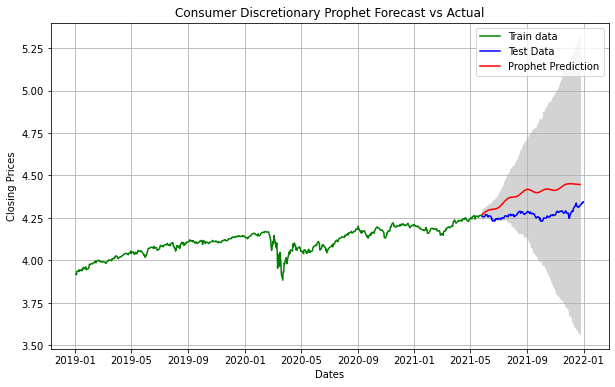

In [40]:
#plot
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(discretionary_train_data, 'Green', label='Train data')
plt.plot(discretionary_test_data, 'blue',  label='Test Data')
plt.plot(forecast['Prediction'], 'Red', label='Prophet Prediction')
plt.fill_between(forecast['yhat_lower'].index, forecast['yhat_lower'], forecast['yhat_upper'], color='lightgrey')
plt.title('Consumer Discretionary Prophet Forecast vs Actual')
plt.legend()

In [42]:
#Prophet Model Statistics
print('Error Statistics for Apple Prophet Model')
mse = mean_squared_error(discretionary_test_data, forecast['Prediction'])
print('MSE: ' + str(mse))
mae = mean_absolute_error(discretionary_test_data, forecast['Prediction'])
print('MAE: '+ str(mae))
rmse = math.sqrt(mean_squared_error(discretionary_test_data, forecast['Prediction']))
print('PRMSE: '+str(rmse))

Error Statistics for Apple Prophet Model
MSE: 0.015442129609965933
MAE: 0.11671244317692214
PRMSE: 0.12426636556190872
